In [2]:
#### NOTEBOOK CONFIG ####

%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append("/home/carlos/Carlos/cerebra-atlas-python")

####### IMPORTS #######

import mne
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
from matplotlib.patches import Rectangle


from cerebra_atlas_python.cerebra import CerebrA
from cerebra_atlas_python.plotting import get_cmap_colors
from cerebra_atlas_python.utils import setup_logging, time_func_decorator
from cerebra_atlas_python.mni_average import MNIAverage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: No mne attribute transforms

In [1]:
setup_logging(level="INFO")
cerebra = CerebrA()


cerebra.orthoview(plot_affine=False, plot_whitematter=True,plot_regions=True, plot_src_space=True)

NameError: name 'setup_logging' is not defined

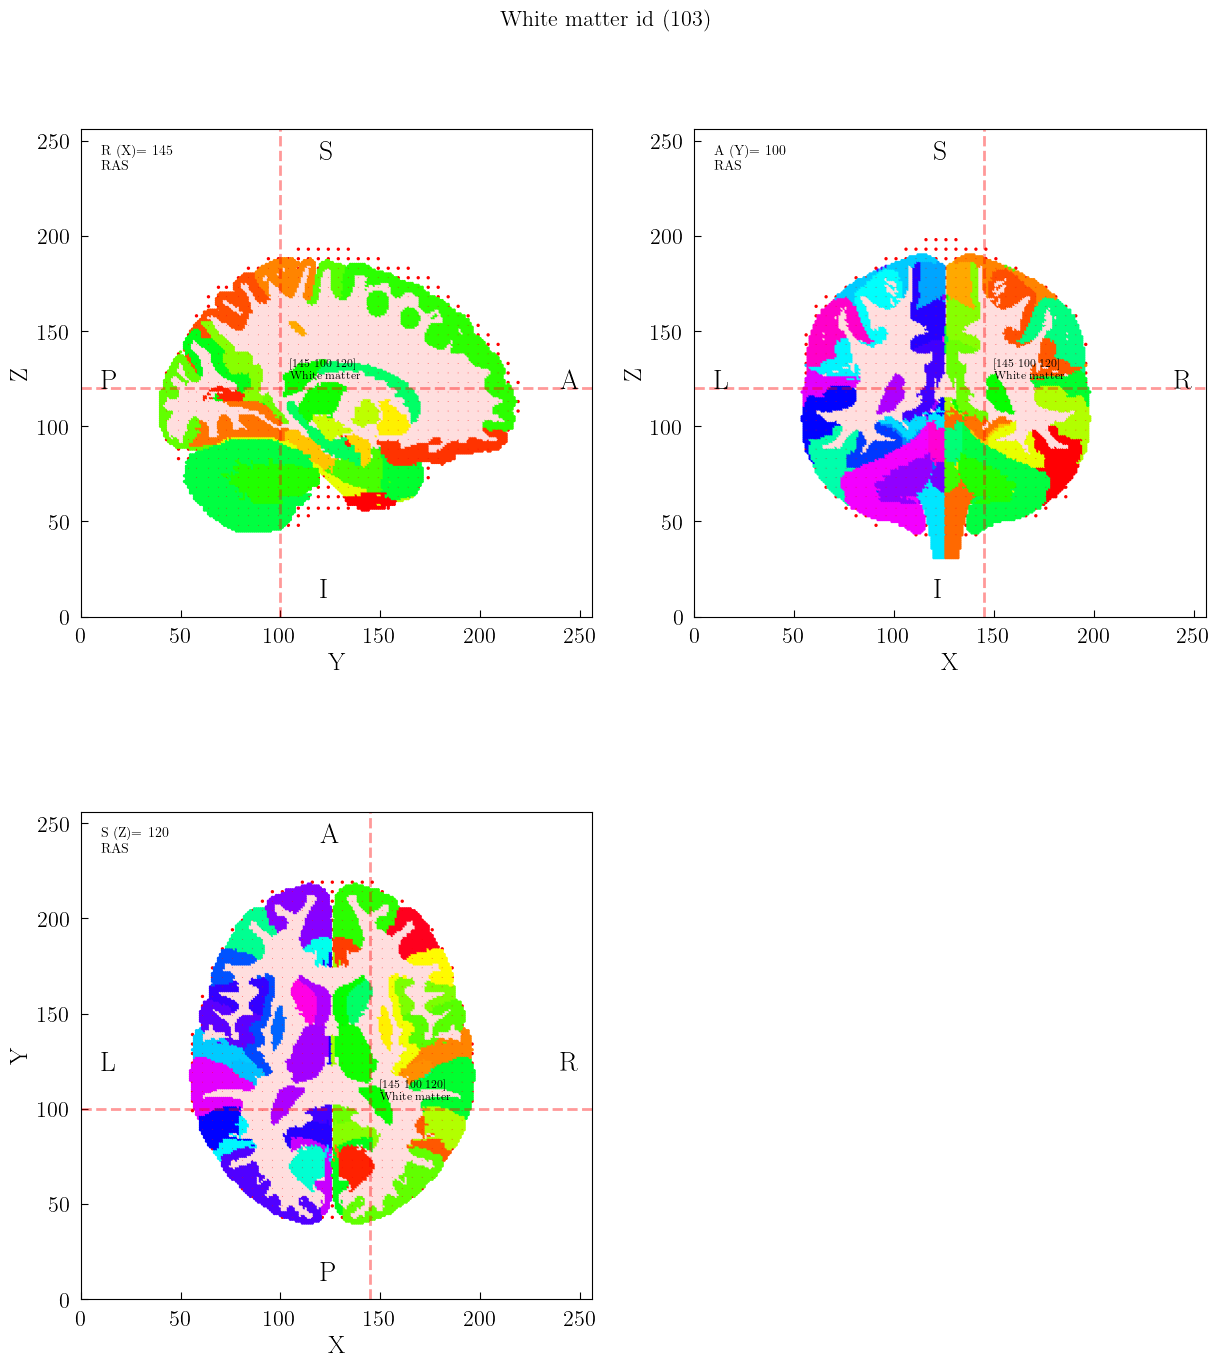

In [21]:
axs = cerebra.orthoview(plot_affine=False, plot_whitematter=True,plot_regions=True, plot_src_space=True,plot_bem_surfaces=False, plot_distance_to_inner_skull=False, pt=np.array([145,100,120]))
